In [1]:
library("ggplot2")
library("readxl")
library("forecast")
library("tseries")
library("urca")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
covid<-data.frame(read_excel("../input/ccovid/ccovid.xlsx"))

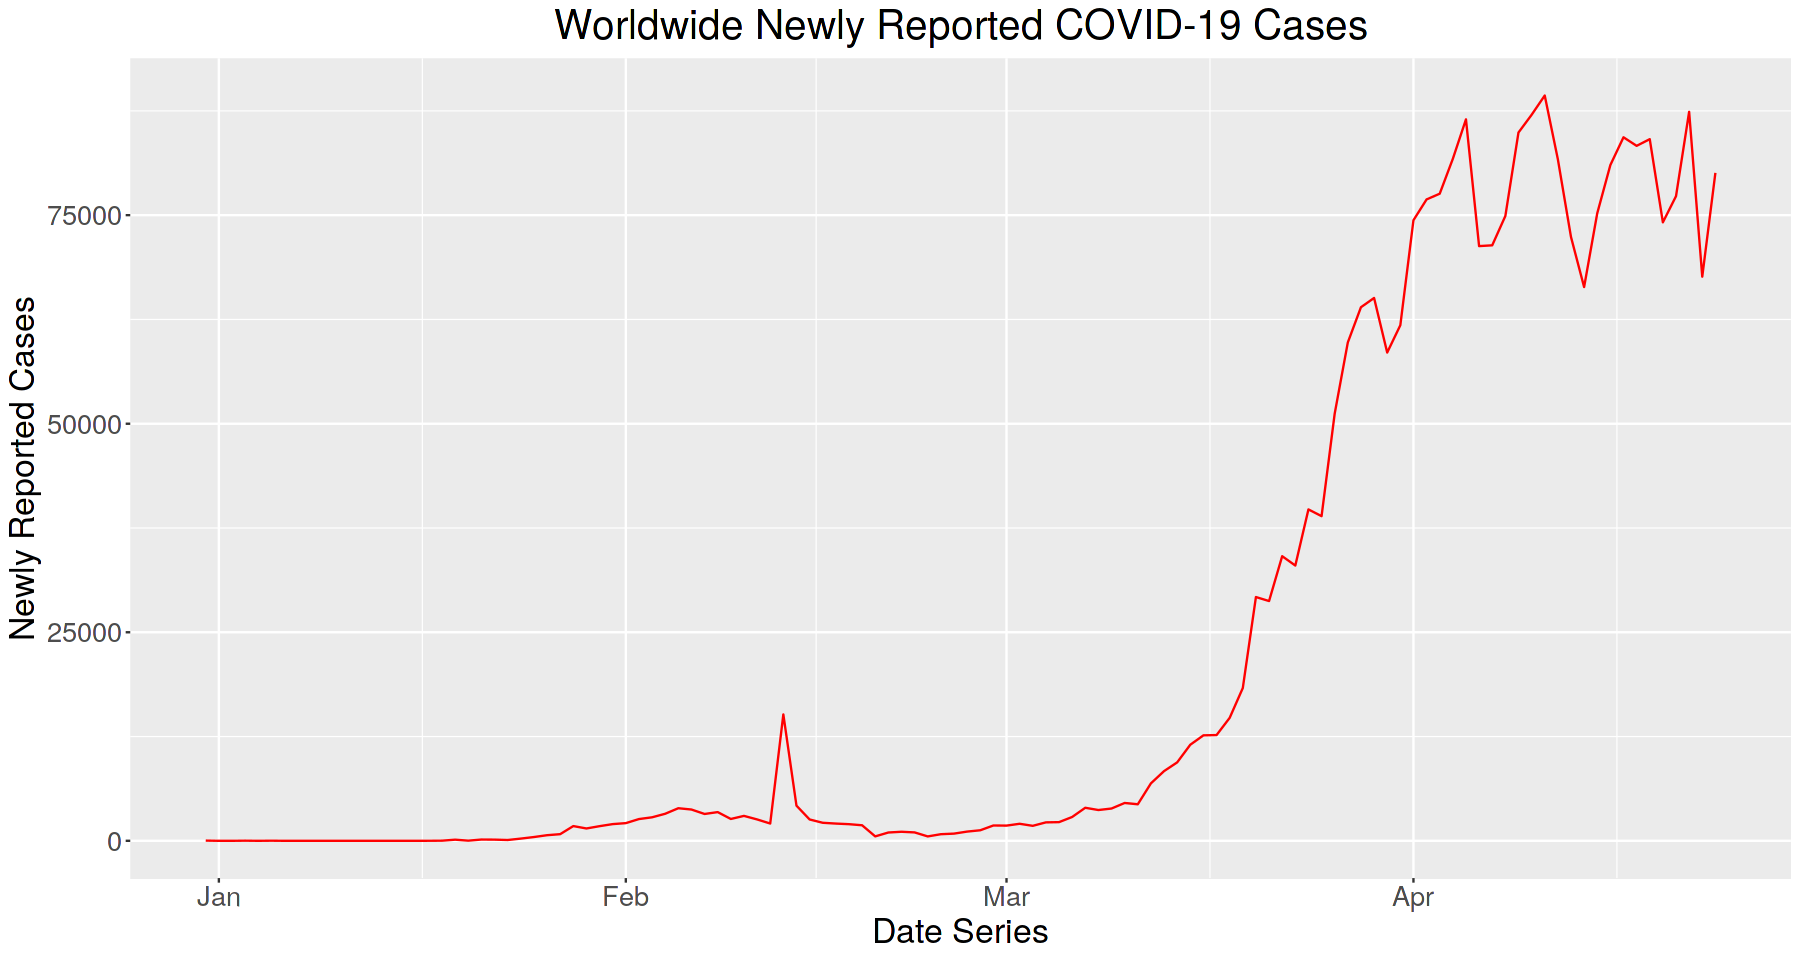

In [5]:
options(repr.plot.width=15, repr.plot.height=8)
total_cases_by_date<-aggregate(covid$cases,by=list(covid$dateRep),FUN=sum)
covid_report_plot<-ggplot(total_cases_by_date,aes(Group.1,x))+geom_line(color="red")
covid_report_plot+ggtitle("Worldwide Newly Reported COVID-19 Cases")+labs(y="Newly Reported Cases", x = "Date Series")+theme(plot.title = element_text(hjust = 0.5))+theme(text = element_text(size=20))  #time-series

In [6]:
total_cases_by_date<-tail(total_cases_by_date,-21)
covidplots<-total_cases_by_date$x

In [7]:
train<-head(covidplots,round(length(covidplots)*0.75))
d<-length(covidplots)-length(train)
test<-tail(covidplots,d)

In [10]:
fit<-tslm(ts(train)~trend)
fit


Call:
tslm(formula = ts(train) ~ trend)

Coefficients:
(Intercept)        trend  
   -11045.2        610.8  


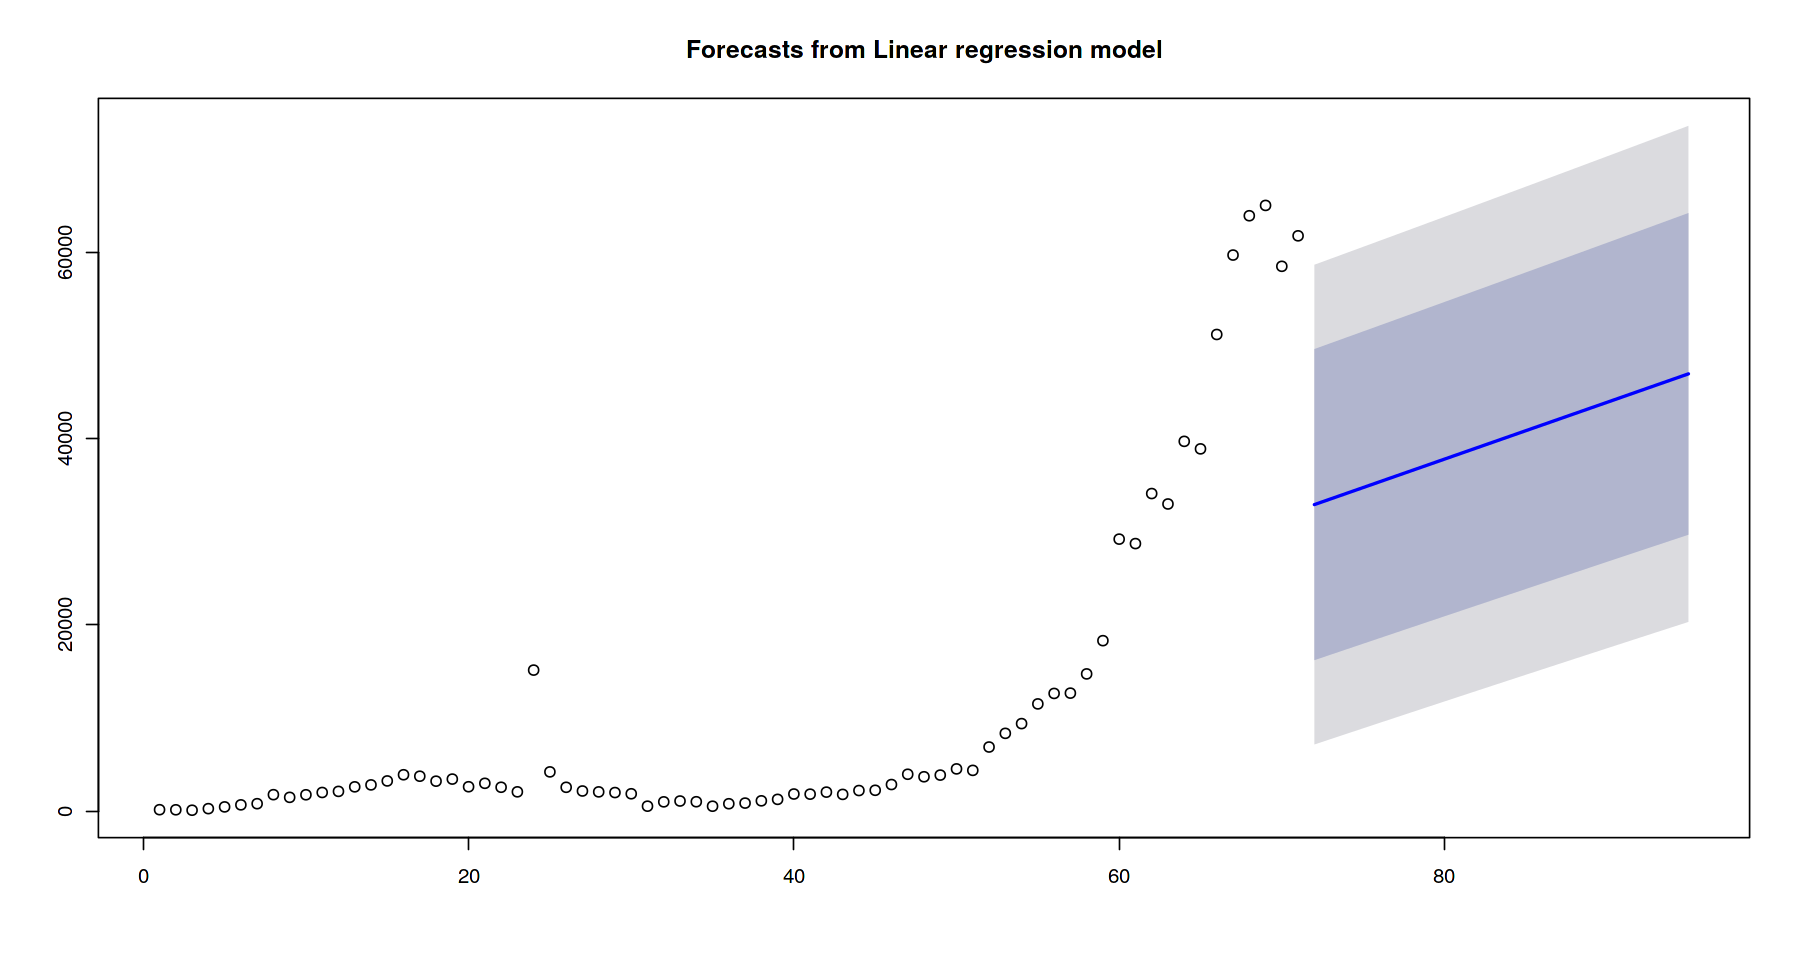

In [12]:
plot(forecast(fit,h=24),type="p")

In [13]:
forecastvalues<-data.frame(forecast(fit,h=24))

In [14]:
fvalues<-forecastvalues$Point.Forecast
fvalues<-ceiling(fvalues)

In [15]:
accuracy(fvalues,test)

,ME,RMSE,MAE,MPE,MAPE
Test set,38832.29,39544.8,38832.29,48.96093,48.96093


### End